In [1]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [2]:
%env CUDA_VISIBLE_DEVICES=""

env: CUDA_VISIBLE_DEVICES=""


In [3]:
from fastai.vision.all import *

/media/girish/HDD/code_repos/bitbucket/repos/machine_learning/.venv/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [5]:
path = untar_data(URLs.MNIST_SAMPLE)
path

Path('/home/girish/.fastai/data/mnist_sample')

In [13]:
!ls -l $HOME/.fastai/data/mnist_sample

total 288
-rw-rw-r-- 1 girish girish 284086 Sep 27  2018 labels.csv
drwxr-x--- 4 girish girish   4096 Sep 26  2018 train
drwxr-x--- 4 girish girish   4096 Sep 26  2018 valid


In [14]:
path.ls()

(#3) [Path('/home/girish/.fastai/data/mnist_sample/labels.csv'),Path('/home/girish/.fastai/data/mnist_sample/valid'),Path('/home/girish/.fastai/data/mnist_sample/train')]

In [15]:
(path / "train").ls()

(#2) [Path('/home/girish/.fastai/data/mnist_sample/train/7'),Path('/home/girish/.fastai/data/mnist_sample/train/3')]

In [24]:
len((path / "train/7").ls()), len((path / "train/3").ls())

(6265, 6131)

In [25]:
threes = (path / "train/3").ls().sorted()
sevens = (path / "train/7").ls().sorted()

In [ ]:
# Image comes from PIL(Python Image Library)
im3 = Image.open(threes[1])
im3

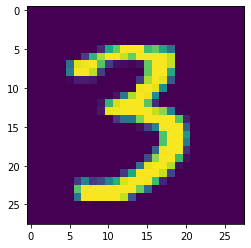

In [33]:
from matplotlib import pyplot as plt

plt.imshow(im3)

In [67]:
import numpy as np

np.array(im3)[4:10, 4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [37]:
# this tensor comes from fastai.torch_core
tensor(im3)[4:10, 4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [39]:
import pandas as pd

df = pd.DataFrame(tensor(im3)[4:15, 4:22])
df.style.set_properties(**{"fontsize": "6pt"}).background_gradient("Greys")

## Pixel Similarity

In [44]:
import PIL


def img_to_tensors(images):
    return [tensor(PIL.Image.open(img_file)) for img_file in images]


seven_tensors = img_to_tensors(sevens)
three_tensors = img_to_tensors(threes)

In [45]:
len(three_tensors), len(seven_tensors)

(6131, 6265)

<AxesSubplot:>

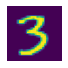

In [47]:
show_image(three_tensors[1])

In [51]:
# When images are floats, pixels values are expected to
# be between 0 and 1
# We are converting the type to float because operation like
# mean in pytorch operate on floats
stacked_sevens = torch.stack(seven_tensors).float() / 255
stacked_threes = torch.stack(three_tensors).float() / 255

stacked_threes.shape, stacked_sevens.shape

(torch.Size([6131, 28, 28]), torch.Size([6265, 28, 28]))

In [68]:
# NOTE: pytorch tensors share a lots of methods similar to
# numpy ndarrays
# rank is the number of axis or dimensions in a tensor
stacked_threes.ndim

# shape gives us the size of each axis in a tensor
stacked_threes.shape

stacked_threes.dtype

3

torch.Size([6131, 28, 28])

torch.float32

In [69]:
# the parameter dim is similar to numpy axis
mean3 = stacked_threes.mean(dim=0)
mean3.shape

torch.Size([28, 28])

<AxesSubplot:>

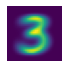

In [70]:
show_image(mean3)

In [72]:
mean7 = stacked_sevens.mean(dim=0)
mean7.shape

torch.Size([28, 28])

<AxesSubplot:>

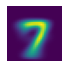

In [73]:
show_image(mean7)

In [104]:
# compute the mean squared error to calculate the similarity
def mae(src, target):
    return (src - target).abs().mean()


def rmse(src, target):
    return ((src - target) ** 2).mean().sqrt()

In [105]:
# similarity of 3 with mean3
mae(stacked_threes[1].flatten(), mean3.flatten())
rmse(stacked_threes[1].flatten(), mean3.flatten())

tensor(0.1114)

tensor(0.2021)

In [106]:
# similarity of a 3 with mean7
mae(stacked_threes[1].flatten(), mean7.flatten())
rmse(stacked_threes[1].flatten(), mean7.flatten())

tensor(0.1586)

tensor(0.3021)

In [109]:
from torch.nn import functional as F

F.l1_loss(stacked_threes[1], mean7)
F.mse_loss(stacked_threes[1], mean7).sqrt()

tensor(0.1586)

tensor(0.3021)

Numpy ndarray and pytorch tensor are similar constructs. 
Pytorch tensors support running on GPU and 
also support computing derivatives.
Pytorch tensors don't support jagged arrays.

In [110]:
tns = tensor([[1, 2, 3], [4, 5, 6]])
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [111]:
tns[1]

tensor([4, 5, 6])

In [112]:
# take all rows but only the last column
tns[:, -1]

tensor([3, 6])

In [114]:
# type of items present in the tensor
tns.dtype

# Type of the tensor object itself
tns.type()

torch.int64

'torch.LongTensor'

In [115]:
tns_floats = tns + 1.5
tns_floats.dtype

torch.float32

In [117]:
three_valid_data = path / "valid/3"
seven_valid_data = path / "valid/7"

len(three_valid_data.ls()), len(seven_valid_data.ls())

(1010, 1028)

In [120]:
stacked_threes_valid = torch.stack(img_to_tensors(three_valid_data.ls())).float() / 255

stacked_sevens_valid = torch.stack(img_to_tensors(seven_valid_data.ls())).float() / 255

In [121]:
stacked_threes_valid.shape, stacked_sevens_valid.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [123]:
def mnist_l1_distance(src, target):
    return (src - target).abs().mean(dim=(-1, -2))

In [125]:
distance_33 = mnist_l1_distance(stacked_threes_valid, mean3)
distance_37 = mnist_l1_distance(stacked_threes_valid, mean7)

In [127]:
predicted_3 = (distance_33 < distance_37).float()

In [128]:
accuracy = predicted_3.sum() / predicted_3.shape[0]

In [129]:
accuracy

tensor(0.9168)

In [130]:
def is_3(x):
    return mnist_l1_distance(x, mean3) < mnist_l1_distance(x, mean7)

In [131]:
accuracy_3s = is_3(stacked_threes_valid).float().mean()
accuracy_7s = 1 - is_3(stacked_sevens_valid).float().mean()
accuracy_3s, accuracy_7s

(tensor(0.9168), tensor(0.9854))

In [132]:
(accuracy_3s + accuracy_7s) / 2

tensor(0.9511)